# Gloabal ocean biogeochemistry

Ersen'S Joseph 

**General goal:**
1. Be able to read data in python including read several data from a folder in a notebook
1. Be able to produce plot in python including produce several plots

**To-do list:** (specify a region)
- [x] Read one data (sla) 
- [x] Read several data from a folder in a notebook
- [x] plot
- [ ] plot more than one variable in a single figure 
- [ ] Plots (subplots from several files data) 

In [28]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import cartopy.crs as ccrs                   # import projections
import cartopy
import gsw
# import cftime

In [29]:
%matplotlib inline  
#%matplotlib qt5 
plt.rcParams['figure.figsize'] = (5,4)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 400
plt.close('all')

__figdir__ = '../plots/' + 'ErsenS_BoB'
savefig_args = {'bbox_inches':'tight', 'pad_inches':0.2}
plotfiletype='png'

# define savefig if we want to use if savefig 
savefig = 1

In [30]:
#specify the grid

#xmin, xmax = (-126,-121)
#ymin, ymax = (36.25,38.5)

In [64]:
#file = '/Users/lfp/Documents/GitHub/satellite_python_2022V2/Data/dt_global_allsat_phy_l4_20190909_20210726.nc'
#file = '../Data/dt_global_allsat_phy_l4_20190909_20210726.nc'

directory = '../Data/*.nc'

#file = '../Data/SLA/20190701-IFR-L3C_GHRSST-SSTsubskin-ODYSSEA-GLOB_010_adjusted-v2.0-fv1.0.nc'

#file = '../Data/dataset-duacs-nrt(7:10:219).nc'

#file = '../Data/dt_global_allsat_phy_l4_20190909_20210726.nc'

#file = '../Data/Data/SLA/20210706-IFR-L3C_GHRSST-SSTsubskin-ODYSSEA-GLOB_010_adjusted-v2.0-fv1.0.nc'

#file = '../Data//20190708-IFR-L3C_GHRSST-SSTsubskin-ODYSSEA-GLOB_010_adjusted-v2.0-fv1.0.nc'

In [96]:
#ds = xr.open_dataset(file)

In [97]:
ds = xr.open_mfdataset(directory)

In [98]:
ds

<xarray.Dataset>
Dimensions:         (time: 2, latitude: 720, longitude: 1440, nv: 2)
Coordinates:
  * time            (time) datetime64[ns] 2019-07-10 2019-09-09
  * latitude        (latitude) float64 -89.88 -89.62 -89.38 ... 89.62 89.88
  * longitude       (longitude) float64 -179.9 -179.6 -179.4 ... 179.6 179.9
  * nv              (nv) int32 0 1
Data variables: (12/14)
    crs             int32 ...
    lat_bnds        (latitude, nv) float32 dask.array<chunksize=(720, 2), meta=np.ndarray>
    lon_bnds        (longitude, nv) float32 dask.array<chunksize=(1440, 2), meta=np.ndarray>
    sla             (time, latitude, longitude) float64 dask.array<chunksize=(2, 720, 1440), meta=np.ndarray>
    err_sla         (time, latitude, longitude) float64 dask.array<chunksize=(2, 720, 1440), meta=np.ndarray>
    ugosa           (time, latitude, longitude) float64 dask.array<chunksize=(2, 720, 1440), meta=np.ndarray>
    ...              ...
    err_vgosa       (time, latitude, longitude) float64 dask.array<chunksize=(2, 720, 1440), meta=np.ndarray>
    adt             (time, latitude, longitude) float64 dask.array<chunksize=(2, 720, 1440), meta=np.ndarray>
    ugos            (time, latitude, longitude) float64 dask.array<chunksize=(2, 720, 1440), meta=np.ndarray>
    vgos            (time, latitude, longitude) float64 dask.array<chunksize=(2, 720, 1440), meta=np.ndarray>
    flag_ice        (time, latitude, longitude) float64 dask.array<chunksize=(2, 720, 1440), meta=np.ndarray>
    tpa_correction  (time) float64 dask.array<chunksize=(2,), meta=np.ndarray>
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_end:               2019-09-09T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2019-09-08T12:00:00Z
    title:                           DT merged all satellites Global Ocean Gr...

In [62]:
#timeindex = 0
#timeindex = 1
sla = ds.sla

TypeError: Input z must be 2D, not 3D

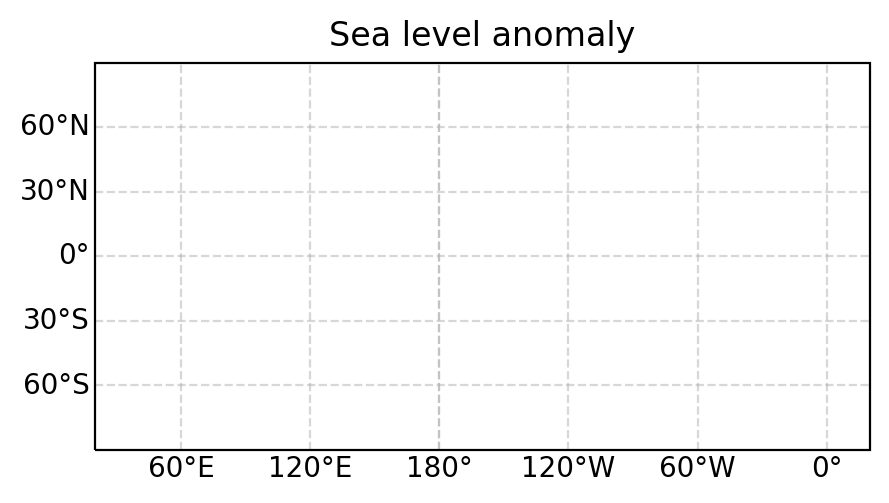

In [12]:
fig = plt.figure()
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
ax.set_title('Sea level anomaly')
#set the size of the axis 
#extent = [xmin, xmax, ymin, ymax]
#[xmin, xmax, ymin, ymax] = [-15,15,-15,9]
#ax.set_xlim(xmin, xmax)
#ax.set_ylim(ymin, ymax)

#ax.set_title('Sea level anomaly (DUACS)')

#plt.set_cmap(cmap=plt.get_cmap('nipy_spectral'))
plt.set_cmap(cmap=plt.get_cmap('turbo'))
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.ylabels_right = False
#gl.xlocator = matplotlib.ticker.MaxNLocator(10)
#gl.xlocator = matplotlib.ticker.AutoLocator
# gl.xlocator = matplotlib.ticker.FixedLocator(np.arange(0, 360 ,30))

levels = 10
cs = ax.contourf(ds.longitude,ds.latitude,np.squeeze(sla), levels, extend='both', transform=ccrs.PlateCarree())
# cs = ax.pcolormesh(ds.longitude,ds.latitude,np.squeeze(ds.sla), vmin=levels[0], vmax=levels[-1], transform=ccrs.PlateCarree())
# cb = plt.colorbar(cs,ax=ax,shrink=.8,pad=.05)
cb = plt.colorbar(cs,fraction = 0.022, extend='both')
cb.set_label('SLA [m]',fontsize = 10)
ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.6,.6,.6], edgecolor='black')

#plot_ops_area(ax,transform=ccrs.PlateCarree(),color='w')


if savefig:
    plt.savefig(__figdir__+'_SLA'+plotfiletype,**savefig_args)

# Add a 10 km scale bar

AttributeError: 'Dataset' object has no attribute 'lon'

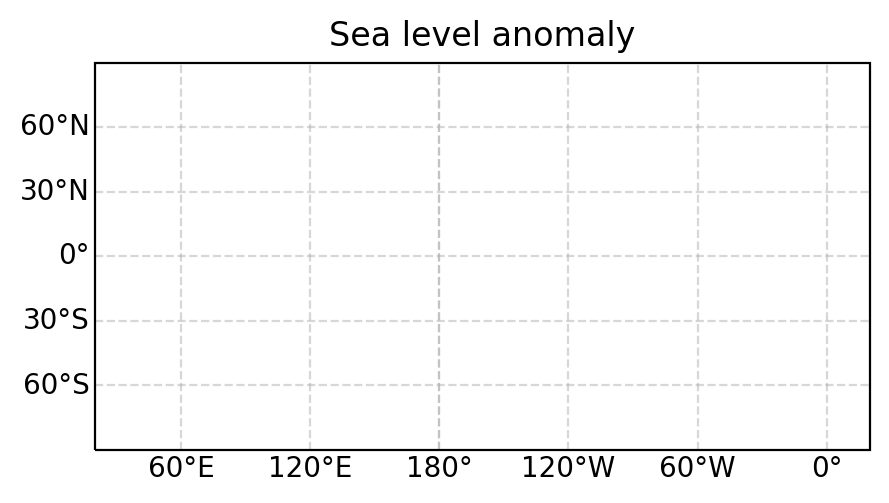

In [52]:
fig = plt.figure()
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
ax.set_title('Sea level anomaly')
#set the size of the axis 
#extent = [xmin, xmax, ymin, ymax]
#[xmin, xmax, ymin, ymax] = [-15,15,-15,9]
#ax.set_xlim(xmin, xmax)
#ax.set_ylim(ymin, ymax)

#ax.set_title('Sea level anomaly (DUACS)')

#plt.set_cmap(cmap=plt.get_cmap('nipy_spectral'))
plt.set_cmap(cmap=plt.get_cmap('turbo'))
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.ylabels_right = False
#gl.xlocator = matplotlib.ticker.MaxNLocator(10)
#gl.xlocator = matplotlib.ticker.AutoLocator
# gl.xlocator = matplotlib.ticker.FixedLocator(np.arange(0, 360 ,30))

levels = 10
cs = ax.contourf(ds.lon,ds.lat,np.squeeze(sst), levels, extend='both', transform=ccrs.PlateCarree())
# cs = ax.pcolormesh(ds.longitude,ds.latitude,np.squeeze(ds.sla), vmin=levels[0], vmax=levels[-1], transform=ccrs.PlateCarree())
# cb = plt.colorbar(cs,ax=ax,shrink=.8,pad=.05)
cb = plt.colorbar(cs,fraction = 0.022, extend='both')
cb.set_label('SLA [m]',fontsize = 10)
ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.6,.6,.6], edgecolor='black')

#plot_ops_area(ax,transform=ccrs.PlateCarree(),color='w')


if savefig:
    plt.savefig(__figdir__+'_SLA'+plotfiletype,**savefig_args)

# Add a 10 km scale bar

/var/folders/x9/37hmb2cj4j72s26nwv19n_xh0000gn/T/ipykernel_50775/560607483.py:25: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(cs,fraction = 0.022, extend='both')


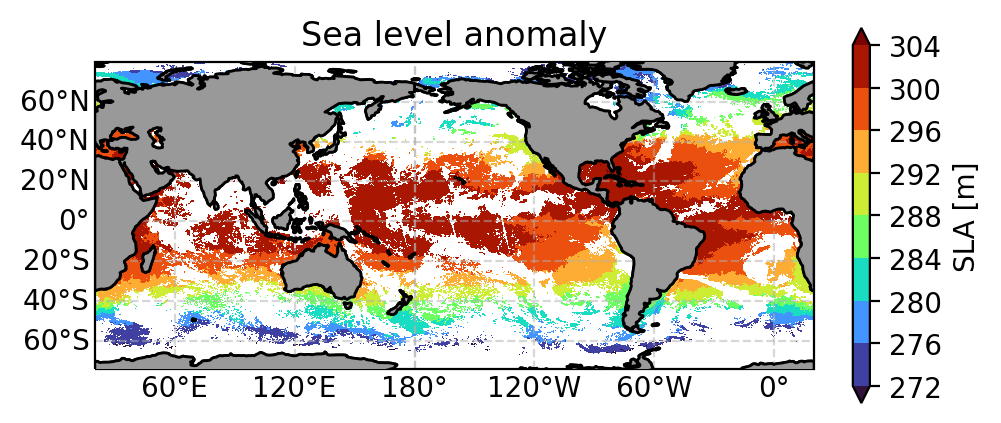

In [12]:
C